In [135]:
# Import libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 500)
pd.set_option('display.float_format', '{:.2f}'.format)

In [136]:
data = pd.read_csv("telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,Na

In [137]:
data.shape

(99999, 226)

In [138]:
len(data['mobile_number'].unique())

99999

### Missing Value Handling

In [139]:
## Mobile number is unique col, 
# Check percentage of empty value in other columns
def printMissingPercentage(df):
    print(round((df.isnull().sum()*100)/len(df),2))

printMissingPercentage(data)    

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
last_date_of_month_7        0.60
last_date_of_month_8        1.10
last_date_of_month_9        1.66
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t

In [140]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

In [141]:
final_data = data.copy()

In [142]:
# Impute last day of the month
final_data['last_date_of_month_7'].fillna('7/31/2014',inplace=True)
final_data['last_date_of_month_8'].fillna('8/31/2014',inplace=True)
final_data['last_date_of_month_9'].fillna('9/30/2014',inplace=True)

In [143]:
# Impute all data columns with 0 considering user has not enabled internet so its data usage was 0
final_data['total_rech_data_6'].fillna(0,inplace=True)
final_data['total_rech_data_7'].fillna(0,inplace=True)
final_data['total_rech_data_8'].fillna(0,inplace=True)
final_data['total_rech_data_9'].fillna(0,inplace=True)

final_data['max_rech_data_6'].fillna(0,inplace=True)
final_data['max_rech_data_7'].fillna(0,inplace=True)
final_data['max_rech_data_8'].fillna(0,inplace=True)
final_data['max_rech_data_9'].fillna(0,inplace=True)

final_data['count_rech_2g_6'].fillna(0,inplace=True)
final_data['count_rech_2g_7'].fillna(0,inplace=True)
final_data['count_rech_2g_8'].fillna(0,inplace=True)
final_data['count_rech_2g_9'].fillna(0,inplace=True)

final_data['count_rech_3g_6'].fillna(0,inplace=True)
final_data['count_rech_3g_7'].fillna(0,inplace=True)
final_data['count_rech_3g_8'].fillna(0,inplace=True)
final_data['count_rech_3g_9'].fillna(0,inplace=True)

final_data['vol_2g_mb_6'].fillna(0,inplace=True)
final_data['vol_2g_mb_7'].fillna(0,inplace=True)
final_data['vol_2g_mb_8'].fillna(0,inplace=True)
final_data['vol_2g_mb_9'].fillna(0,inplace=True)

final_data['vol_3g_mb_6'].fillna(0,inplace=True)
final_data['vol_3g_mb_7'].fillna(0,inplace=True)
final_data['vol_3g_mb_8'].fillna(0,inplace=True)
final_data['vol_3g_mb_9'].fillna(0,inplace=True)

final_data['vol_3g_mb_6'].fillna(0,inplace=True)
final_data['vol_3g_mb_7'].fillna(0,inplace=True)
final_data['vol_3g_mb_8'].fillna(0,inplace=True)
final_data['vol_3g_mb_9'].fillna(0,inplace=True)

final_data['av_rech_amt_data_6'].fillna(0,inplace=True)
final_data['av_rech_amt_data_7'].fillna(0,inplace=True)
final_data['av_rech_amt_data_8'].fillna(0,inplace=True)
final_data['av_rech_amt_data_9'].fillna(0,inplace=True)

final_data['arpu_3g_6'].fillna(0,inplace=True)
final_data['arpu_3g_7'].fillna(0,inplace=True)
final_data['arpu_3g_8'].fillna(0,inplace=True)
final_data['arpu_3g_9'].fillna(0,inplace=True)

final_data['arpu_2g_6'].fillna(0,inplace=True)
final_data['arpu_2g_7'].fillna(0,inplace=True)
final_data['arpu_2g_8'].fillna(0,inplace=True)
final_data['arpu_2g_9'].fillna(0,inplace=True)

final_data['night_pck_user_6'].fillna(0,inplace=True)
final_data['night_pck_user_7'].fillna(0,inplace=True)
final_data['night_pck_user_8'].fillna(0,inplace=True)
final_data['night_pck_user_9'].fillna(0,inplace=True)

final_data['fb_user_6'].fillna(0,inplace=True)
final_data['fb_user_7'].fillna(0,inplace=True)
final_data['fb_user_8'].fillna(0,inplace=True)
final_data['fb_user_9'].fillna(0,inplace=True)

In [144]:
#Impute all the mou columns as 0 for na as total_og and total_ic are also 0 for these rows
col_to_impute = ["onnet_mou_6","onnet_mou_7","onnet_mou_8","onnet_mou_9",
                "offnet_mou_6","offnet_mou_7","offnet_mou_8","offnet_mou_9",
                "roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8","roam_ic_mou_9",
                "roam_og_mou_6","roam_og_mou_7","roam_og_mou_8","roam_og_mou_9",
                "loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8","loc_og_t2t_mou_9",
                "loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8","loc_og_t2m_mou_9",
                "loc_og_t2f_mou_6","loc_og_t2f_mou_7","loc_og_t2f_mou_8","loc_og_t2f_mou_9",
                "loc_og_t2c_mou_6","loc_og_t2c_mou_7","loc_og_t2c_mou_8","loc_og_t2c_mou_9",
                "loc_og_mou_6","loc_og_mou_7","loc_og_mou_8","loc_og_mou_9",
                "std_og_t2t_mou_6","std_og_t2t_mou_7","std_og_t2t_mou_8","std_og_t2t_mou_9",
                "std_og_t2m_mou_6","std_og_t2m_mou_7","std_og_t2m_mou_8","std_og_t2m_mou_9",
                "std_og_t2f_mou_6","std_og_t2f_mou_7","std_og_t2f_mou_8","std_og_t2f_mou_9",
                "std_og_mou_6","std_og_mou_7","std_og_mou_8","std_og_mou_9",
                "spl_og_mou_6","spl_og_mou_7","spl_og_mou_8","spl_og_mou_9",
                "loc_ic_t2t_mou_6","loc_ic_t2t_mou_7","loc_ic_t2t_mou_8","loc_ic_t2t_mou_9",
                "loc_ic_t2m_mou_6","loc_ic_t2m_mou_7","loc_ic_t2m_mou_8","loc_ic_t2m_mou_9",
                "loc_ic_t2f_mou_6","loc_ic_t2f_mou_7","loc_ic_t2f_mou_8","loc_ic_t2f_mou_9",
                "loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8","loc_ic_mou_9",
                "std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2t_mou_8","std_ic_t2t_mou_9",
                "std_ic_t2m_mou_6","std_ic_t2m_mou_7","std_ic_t2m_mou_8","std_ic_t2m_mou_9",
                "std_ic_t2f_mou_6","std_ic_t2f_mou_7","std_ic_t2f_mou_8","std_ic_t2f_mou_9",
                "std_ic_mou_6","std_ic_mou_7","std_ic_mou_8","std_ic_mou_9",
                "spl_ic_mou_6","spl_ic_mou_7","spl_ic_mou_8","spl_ic_mou_9",
                "isd_ic_mou_6","isd_ic_mou_7","isd_ic_mou_8","isd_ic_mou_9",
                "ic_others_6","ic_others_7","ic_others_8","ic_others_9",
                "std_ic_t2f_mou_6","std_ic_t2f_mou_7","std_ic_t2f_mou_8","std_ic_t2f_mou_9","og_others_6",
                "std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8","std_ic_t2o_mou_9",
                "og_others_7","og_others_8","og_others_9","isd_og_mou_6","isd_og_mou_7","isd_og_mou_8","isd_og_mou_9",
                "std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8","std_og_t2c_mou_9","loc_og_t2o_mou","std_og_t2o_mou",
                "loc_ic_t2o_mou"]

for col in col_to_impute:
    final_data[col].fillna(0,inplace=True)

In [145]:
printMissingPercentage(final_data)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              0.00
std_og_t2o_mou              0.00
loc_ic_t2o_mou              0.00
last_date_of_month_6        0.00
last_date_of_month_7        0.00
last_date_of_month_8        0.00
last_date_of_month_9        0.00
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 0.00
onnet_mou_7                 0.00
onnet_mou_8                 0.00
onnet_mou_9                 0.00
offnet_mou_6                0.00
offnet_mou_7                0.00
offnet_mou_8                0.00
offnet_mou_9                0.00
roam_ic_mou_6               0.00
roam_ic_mou_7               0.00
roam_ic_mou_8               0.00
roam_ic_mou_9               0.00
roam_og_mou_6               0.00
roam_og_mou_7               0.00
roam_og_mou_8               0.00
roam_og_mou_9               0.00
loc_og_t2t_mou_6            0.00
loc_og_t2t

In [146]:

# Dropping last recharge date as it doesnt add any value for analysis we already have monthly recharge count
final_data = final_data.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9"],axis=1)
final_data = final_data.drop(["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9"],axis=1)

In [147]:
printMissingPercentage(final_data)

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         0.00
std_og_t2o_mou         0.00
loc_ic_t2o_mou         0.00
last_date_of_month_6   0.00
last_date_of_month_7   0.00
last_date_of_month_8   0.00
last_date_of_month_9   0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            0.00
onnet_mou_7            0.00
onnet_mou_8            0.00
onnet_mou_9            0.00
offnet_mou_6           0.00
offnet_mou_7           0.00
offnet_mou_8           0.00
offnet_mou_9           0.00
roam_ic_mou_6          0.00
roam_ic_mou_7          0.00
roam_ic_mou_8          0.00
roam_ic_mou_9          0.00
roam_og_mou_6          0.00
roam_og_mou_7          0.00
roam_og_mou_8          0.00
roam_og_mou_9          0.00
loc_og_t2t_mou_6       0.00
loc_og_t2t_mou_7       0.00
loc_og_t2t_mou_8       0.00
loc_og_t2t_mou_9       0.00
loc_og_t2m_mou_6       0.00
loc_og_t2m_mou_7       0.00
loc_og_t2m_mou_8    

### Filter high value customer

In [148]:
# Calculate total recharge amount for data
final_data["total_rech_amt_data_6"]  = final_data["av_rech_amt_data_6"]*final_data["total_rech_data_6"]
final_data["total_rech_amt_data_7"]  = final_data["av_rech_amt_data_7"]*final_data["total_rech_data_7"]
final_data["total_rech_amt_data_8"]  = final_data["av_rech_amt_data_8"]*final_data["total_rech_data_8"]
final_data["total_rech_amt_data_9"]  = final_data["av_rech_amt_data_9"]*final_data["total_rech_data_9"]


In [149]:
# Calculate avegrate recharge amount in good phase as 6 and 7 month
final_data["avg_rech_amt_good"] = (final_data["total_rech_amt_6"] + final_data["total_rech_amt_data_6"] + final_data['total_rech_amt_7'] + final_data["total_rech_amt_data_7"] )/2

In [150]:
# Get the 70% quarentile amount
amount  = final_data["avg_rech_amt_good"].quantile(.7)
amount

478.0

In [151]:
# Filter rows which has amount >= quarentile amount.
final_data = final_data[final_data["avg_rech_amt_good"] >= amount]
len(final_data)

30001

### Perform clean up

In [152]:
# Drop all columns which are correlated with the new columns added
final_data = final_data.drop(["av_rech_amt_data_6","total_rech_data_6","av_rech_amt_data_7","total_rech_data_7"
                             ,"av_rech_amt_data_8","total_rech_data_8","av_rech_amt_data_9","total_rech_data_9",
                              "avg_rech_amt_good"
                              ],axis=1)

In [153]:
final_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
count,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,300

In [154]:
# Drop mobile number
final_data = final_data.drop("mobile_number",axis=1)

In [155]:
final_data  = final_data.drop(["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9"],axis=1)

In [156]:
final_data.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
count,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00,30001.00

In [157]:
col_with_0_std = []
for col in final_data.columns:
    if final_data[col].std() == 0:
        col_with_0_std.append(col)
col_with_0_std   

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [158]:
final_data  = final_data.drop(col_with_0_std,axis=1)

In [159]:
final_data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
0,197.38,214.82,213.80,21.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,252.00,252.00,252.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.00,1.00,1.00,0.00,968,30.40,0.00,101.20,3.58,252.00,252.00,252.00,0.00
7,1069.18,1349.85,3171.48,500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0

In [160]:

final_data["arpu_good"] = final_data["arpu_6"] + final_data["arpu_7"]
final_data = final_data.drop(["arpu_6","arpu_7"],axis=1)

final_data["onnet_mou_good"] = final_data["onnet_mou_6"] + final_data["onnet_mou_7"]
final_data = final_data.drop(["onnet_mou_6","onnet_mou_7"],axis=1)

final_data["offnet_mou_good"] = final_data["offnet_mou_6"] + final_data["offnet_mou_7"]
final_data = final_data.drop(["offnet_mou_6","offnet_mou_7"],axis=1)

final_data["roam_ic_mou_good"] = final_data["roam_ic_mou_6"] + final_data["roam_ic_mou_7"]
final_data = final_data.drop(["roam_ic_mou_6","roam_ic_mou_7"],axis=1)

final_data["roam_og_mou_good"] = final_data["roam_og_mou_6"] + final_data["roam_og_mou_7"]
final_data = final_data.drop(["roam_og_mou_6","roam_og_mou_7"],axis=1)

final_data["loc_og_t2t_mou_good"] = final_data["loc_og_t2t_mou_6"] + final_data["loc_og_t2t_mou_7"]
final_data = final_data.drop(["loc_og_t2t_mou_6","loc_og_t2t_mou_7"],axis=1)

final_data["loc_og_t2m_mou_good"] = final_data["loc_og_t2m_mou_6"] + final_data["loc_og_t2m_mou_7"]
final_data = final_data.drop(["loc_og_t2m_mou_6","loc_og_t2m_mou_7"],axis=1)

final_data["loc_og_t2f_mou_good"] = final_data["loc_og_t2f_mou_6"] + final_data["loc_og_t2f_mou_7"]
final_data = final_data.drop(["loc_og_t2f_mou_6","loc_og_t2f_mou_7"],axis=1)

final_data["loc_og_t2c_mou_good"] = final_data["loc_og_t2c_mou_6"] + final_data["loc_og_t2c_mou_7"]
final_data = final_data.drop(["loc_og_t2c_mou_6","loc_og_t2c_mou_7"],axis=1)

final_data["loc_og_mou_good"] = final_data["loc_og_mou_6"] + final_data["loc_og_mou_7"]
final_data = final_data.drop(["loc_og_mou_6","loc_og_mou_7"],axis=1)

final_data["std_og_t2t_mou_good"] = final_data["std_og_t2t_mou_6"] + final_data["std_og_t2t_mou_7"]
final_data = final_data.drop(["std_og_t2t_mou_6","std_og_t2t_mou_7"],axis=1)

final_data["std_og_t2m_mou_good"] = final_data["std_og_t2m_mou_6"] + final_data["std_og_t2m_mou_7"]
final_data = final_data.drop(["std_og_t2m_mou_6","std_og_t2m_mou_7"],axis=1)

final_data["std_og_t2f_mou_good"] = final_data["std_og_t2f_mou_6"] + final_data["std_og_t2f_mou_7"]
final_data = final_data.drop(["std_og_t2f_mou_6","std_og_t2f_mou_7"],axis=1)

final_data["std_og_mou_good"] = final_data["std_og_mou_6"] + final_data["std_og_mou_7"]
final_data = final_data.drop(["std_og_mou_6","std_og_mou_7"],axis=1)

final_data["isd_og_mou_good"] = final_data["isd_og_mou_6"] + final_data["isd_og_mou_7"]
final_data = final_data.drop(["isd_og_mou_6","isd_og_mou_7"],axis=1)

final_data["spl_og_mou_good"] = final_data["spl_og_mou_6"] + final_data["spl_og_mou_7"]
final_data = final_data.drop(["spl_og_mou_6","spl_og_mou_7"],axis=1)

final_data["og_others_good"] = final_data["og_others_6"] + final_data["og_others_7"]
final_data = final_data.drop(["og_others_6","og_others_7"],axis=1)

final_data["total_og_mou_good"] = final_data["total_og_mou_6"] + final_data["total_og_mou_7"]
final_data = final_data.drop(["total_og_mou_6","total_og_mou_7"],axis=1)

final_data["loc_ic_t2t_mou_good"] = final_data["loc_ic_t2t_mou_6"] + final_data["loc_ic_t2t_mou_7"]
final_data = final_data.drop(["loc_ic_t2t_mou_6","loc_ic_t2t_mou_7"],axis=1)

final_data["loc_ic_t2m_mou_good"] = final_data["loc_ic_t2m_mou_6"] + final_data["loc_ic_t2m_mou_7"]
final_data = final_data.drop(["loc_ic_t2m_mou_6","loc_ic_t2m_mou_7"],axis=1)

final_data["loc_ic_t2f_mou_good"] = final_data["loc_ic_t2f_mou_6"] + final_data["loc_ic_t2f_mou_7"]
final_data = final_data.drop(["loc_ic_t2f_mou_6","loc_ic_t2f_mou_7"],axis=1)

final_data["loc_ic_mou_good"] = final_data["loc_ic_mou_6"] + final_data["loc_ic_mou_7"]
final_data = final_data.drop(["loc_ic_mou_6","loc_ic_mou_7"],axis=1)

final_data["std_ic_t2t_mou_good"] = final_data["std_ic_t2t_mou_6"] + final_data["std_ic_t2t_mou_7"]
final_data = final_data.drop(["std_ic_t2t_mou_6","std_ic_t2t_mou_7"],axis=1)

final_data["std_ic_t2m_mou_good"] = final_data["std_ic_t2m_mou_6"] + final_data["std_ic_t2m_mou_7"]
final_data = final_data.drop(["std_ic_t2m_mou_6","std_ic_t2m_mou_7"],axis=1)

final_data["std_ic_t2f_mou_good"] = final_data["std_ic_t2f_mou_6"] + final_data["std_ic_t2f_mou_7"]
final_data = final_data.drop(["std_ic_t2f_mou_6","std_ic_t2f_mou_7"],axis=1)

final_data["std_ic_mou_good"] = final_data["std_ic_mou_6"] + final_data["std_ic_mou_7"]
final_data = final_data.drop(["std_ic_mou_6","std_ic_mou_7"],axis=1)

final_data["total_ic_mou_good"] = final_data["total_ic_mou_6"] + final_data["total_ic_mou_7"]
final_data = final_data.drop(["total_ic_mou_6","total_ic_mou_7"],axis=1)

final_data["spl_ic_mou_good"] = final_data["spl_ic_mou_6"] + final_data["spl_ic_mou_7"]
final_data = final_data.drop(["spl_ic_mou_6","spl_ic_mou_7"],axis=1)

final_data["isd_ic_mou_good"] = final_data["isd_ic_mou_6"] + final_data["isd_ic_mou_7"]
final_data = final_data.drop(["isd_ic_mou_6","isd_ic_mou_7"],axis=1)

final_data["ic_others_good"] = final_data["ic_others_6"] + final_data["ic_others_7"]
final_data = final_data.drop(["ic_others_6","ic_others_7"],axis=1)

final_data["max_rech_amt_good"] = final_data["max_rech_amt_6"] + final_data["max_rech_amt_7"]
final_data = final_data.drop(["max_rech_amt_6","max_rech_amt_7"],axis=1)

final_data["last_day_rch_amt_good"] = final_data["last_day_rch_amt_6"] + final_data["last_day_rch_amt_7"]
final_data = final_data.drop(["last_day_rch_amt_6","last_day_rch_amt_7"],axis=1)

final_data["max_rech_data_good"] = final_data["max_rech_data_6"] + final_data["max_rech_data_7"]
final_data = final_data.drop(["max_rech_data_6","max_rech_data_7"],axis=1)

final_data["count_rech_2g_good"] = final_data["count_rech_2g_6"] + final_data["count_rech_2g_7"]
final_data = final_data.drop(["count_rech_2g_6","count_rech_2g_7"],axis=1)

final_data["count_rech_3g_good"] = final_data["count_rech_3g_6"] + final_data["count_rech_3g_7"]
final_data = final_data.drop(["count_rech_3g_6","count_rech_3g_7"],axis=1)

final_data["vol_2g_mb_good"] = final_data["vol_2g_mb_6"] + final_data["vol_2g_mb_7"]
final_data = final_data.drop(["vol_2g_mb_6","vol_2g_mb_7"],axis=1)

final_data["vol_3g_mb_good"] = final_data["vol_3g_mb_6"] + final_data["vol_3g_mb_7"]
final_data = final_data.drop(["vol_3g_mb_6","vol_3g_mb_7"],axis=1)

final_data["arpu_3g_good"] = final_data["arpu_3g_6"] + final_data["arpu_3g_7"]
final_data = final_data.drop(["arpu_3g_6","arpu_3g_7"],axis=1)

final_data["monthly_2g_good"] = final_data["monthly_2g_6"] + final_data["monthly_2g_7"]
final_data = final_data.drop(["monthly_2g_6","monthly_2g_7"],axis=1)

final_data["night_pck_user_good"] = final_data["night_pck_user_6"] + final_data["night_pck_user_7"]
final_data = final_data.drop(["night_pck_user_6","night_pck_user_7"],axis=1)

final_data["sachet_2g_good"] = final_data["sachet_2g_6"] + final_data["sachet_2g_7"]
final_data = final_data.drop(["sachet_2g_6","sachet_2g_7"],axis=1)

final_data["monthly_3g_good"] = final_data["monthly_3g_6"] + final_data["monthly_3g_7"]
final_data = final_data.drop(["monthly_3g_6","monthly_3g_7"],axis=1)

final_data["sachet_3g_good"] = final_data["sachet_3g_6"] + final_data["sachet_3g_7"]
final_data = final_data.drop(["sachet_3g_6","sachet_3g_7"],axis=1)

final_data["total_rech_num_good"] = final_data["total_rech_num_6"] + final_data["total_rech_num_7"]
final_data = final_data.drop(["total_rech_num_6","total_rech_num_7"],axis=1)

final_data["total_rech_amt_good"] = final_data["total_rech_amt_6"] + final_data["total_rech_amt_7"]
final_data = final_data.drop(["total_rech_amt_6","total_rech_amt_7"],axis=1)

final_data["total_rech_amt_data_good"] = final_data["total_rech_amt_data_6"] + final_data["total_rech_amt_data_7"]
final_data = final_data.drop(["total_rech_amt_data_6","total_rech_amt_data_7"],axis=1)

final_data["fb_user_good"] = final_data["fb_user_6"] + final_data["fb_user_7"]
final_data = final_data.drop(["fb_user_6","fb_user_7"],axis=1)


final_data["arpu_2g_good"] = final_data["arpu_2g_6"] + final_data["arpu_2g_7"]
final_data = final_data.drop(["arpu_2g_6","arpu_2g_7"],axis=1)


In [161]:
final_data.head()

,arpu_8,arpu_9,onnet_mou_8,onnet_mou_9,offnet_mou_8,offnet_mou_9,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_8,std_og_mou_9,isd_og_mou_8,isd_og_mou_9,spl_og_mou_8,spl_og_mou_9,og_others_8,og_others_9,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_8,std_ic_mou_9,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_8,isd_ic_mou_9,ic_others_8,ic_others_9,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_8,last_day_rch_amt_9,max_rech_data_8,max_rech_data_9,count_rech_2g_8,count_rech_2g_9,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_8,arpu_3g_9,arpu_2g_8,arpu_2g_9,night_pck_user_8,night_pck_user_9,monthly_2g_8,monthly_2g_9,sachet_2g_8,sachet_2g_9,monthly_3g_8,monthly_3g_9,sachet_3g_8,sachet_3g_9,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_8,total_rech_amt_data_9,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,fb_user_good,arpu_2g_good
0,213.80,21.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,4.13,0.00,1.15,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,6,252,0,252,0,252,0,252.00,0.00,0.00,0.00,1.00,0.00,5.75,0.00,109.61,0.00,212.17,0.00,212.17,0.00,0.00,0.00,0,0,0,0,1,0,0,0,1.00,0.00,968,30.40,0.00,101.20,3.58,252.00,0.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,2.00,424.34
7,3171.48,500.00,52.29,0.00,325.91,0.00,31.64,0.00,38.06,0.00,40.28,0.00,162.28,0.00,53.23,0.00,0.00,0.00,255.79,0.00,12.01,0.00,49.14,0.00,16.68,0.00,77.84,0.00,10.01,0.00,6.50,0.00,0.00,0.00,350.16,0.00,27.31,0.00,121.19,0.00,39.53,0.00,188.04,0.00,30.39,0.00,141.33,0.00,22.21,0.00,193.94,0.00,428.74,0.00,0.00,0.00,31.59,0.00,15.14,0.00,7,3,3638,0,1580,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0.00,802,57.74,19.38,18.74,0.00,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,0.00
8,137.36,166.79,35.08,33.46,136.48,108.71,0.00,0.00,0.00,0.00,12.49,26.13,50.54,34.58,0.00,0.00,7.15,0.00,63.04,60.71,22.58,7.33,75.69,74.13,0.00,0.00,98.28,81.46,0.00,0.00,10.23,0.00,0.00,0.00,171.56,142.18,0.31,4.03,15.48,

In [183]:
final_data.rename(columns={
    "arpu_8":"arpu_action",
    "onnet_mou_8":"onnet_mou_action",
    "offnet_mou_8":"offnet_mou_action",
    "roam_ic_mou_8":"roam_ic_mou_action",
    "roam_og_mou_8":"roam_og_mou_action",
    "loc_og_t2t_mou_8":"loc_og_t2t_mou_action",
    "loc_og_t2m_mou_8":"loc_og_t2m_mou_action",
    "loc_og_t2f_mou_8":"loc_og_t2f_mou_action",
    "loc_og_t2c_mou_8":"loc_og_t2c_mou_action",
    "loc_og_mou_8":"loc_og_mou_action",
    "std_og_t2t_mou_8":"std_og_t2t_mou_action",
    "std_og_t2m_mou_8":"std_og_t2m_mou_action",
    "std_og_t2f_mou_8":"std_og_t2f_mou_action",
    "std_og_mou_8":"std_og_mou_action",
    "isd_og_mou_8":"isd_og_mou_action",
    "spl_og_mou_8":"spl_og_mou_action",
    "og_others_8":"og_others_action",
    "total_og_mou_8":"total_og_mou_action",
    "loc_ic_t2t_mou_8":"loc_ic_t2t_mou_action",
    "loc_ic_t2m_mou_8":"loc_ic_t2m_mou_action",
    "loc_ic_t2f_mou_8":"loc_ic_t2f_mou_action",
    "loc_ic_mou_8":"loc_ic_mou_action",
    "std_ic_t2t_mou_8":"std_ic_t2t_mou_action",
    "std_ic_t2m_mou_8":"std_ic_t2m_mou_action",
    "std_ic_t2f_mou_8":"std_ic_t2f_mou_action",
    "std_ic_mou_8":"std_ic_mou_action",
    "total_ic_mou_8":"total_ic_mou_action",
    "spl_ic_mou_8":"spl_ic_mou_action",
    "isd_ic_mou_8":"isd_ic_mou_action",
    "ic_others_8":"ic_others_action",
    "total_rech_num_8":"total_rech_num_action",
    "total_rech_amt_8":"total_rech_amt_action",
    "max_rech_amt_8":"max_rech_amt_action","fb_user_8":"fb_user_action","total_rech_amt_data_8":"total_rech_amt_data_action",
    "last_day_rch_amt_8":"last_day_rch_amt_action","monthly_3g_8":"monthly_3g_action","sachet_3g_8":"sachet_3g_action",
    "max_rech_data_8":"max_rech_data_action","monthly_2g_8":"monthly_2g_action","sachet_2g_8":"sachet_2g_action",
    "count_rech_2g_8":"count_rech_2g_action","arpu_2g_8":"arpu_2g_action","night_pck_user_8":"night_pck_user_action",
    "count_rech_3g_8":"count_rech_3g_action","vol_2g_mb_8":"vol_2g_mb_action","vol_3g_mb_8":"vol_3g_mb_action","arpu_3g_8":"arpu_3g_action"
},inplace=True)

In [184]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,std_og_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,total_og_mou_action,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,std_ic_mou_action,total_ic_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,fb_user_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,fb_user_good,arpu_2g_good,Churn
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,1.00,968,30.40,0.00,101.20,3.58,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,2.00,424.34,1
7,3171.48,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.00,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,802,57.74,19.38,18.74,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,0.00,1
8,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.00,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,1.00,315,21.03,910.65,122.16,0.00,207.00,870.94,764.72,175.29,0.00,0.00,514.72,151.54,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,940.02,33.68,71.56,0.00,105.26,0.58,26.51,0.00,27.09,132.35,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,1.00,0.00,0
21,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.00,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,720,0.00,0.00,0.00,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,10.64,179.74,0.75,0.00,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,1889.13,12.67,192.86,7.45,213.01,20.04,105.92,0.00,125.97,338.98,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0.00,0
23,366.97,33.58,205.89,0.00,0.00,3

In [185]:
final_data["Churn"] = final_data["total_ic_mou_9"] + final_data["total_og_mou_9"] + final_data["vol_2g_mb_9"] + final_data["vol_3g_mb_9"] == 0

KeyError: 'total_ic_mou_9'

In [186]:
final_data["Churn"] = final_data["Churn"].map({True:1,False:0})

In [167]:
final_data.head()

,arpu_action,arpu_9,onnet_mou_action,onnet_mou_9,offnet_mou_action,offnet_mou_9,roam_ic_mou_action,roam_ic_mou_9,roam_og_mou_action,roam_og_mou_9,loc_og_t2t_mou_action,loc_og_t2t_mou_9,loc_og_t2m_mou_action,loc_og_t2m_mou_9,loc_og_t2f_mou_action,loc_og_t2f_mou_9,loc_og_t2c_mou_action,loc_og_t2c_mou_9,loc_og_mou_action,loc_og_mou_9,std_og_t2t_mou_action,std_og_t2t_mou_9,std_og_t2m_mou_action,std_og_t2m_mou_9,std_og_t2f_mou_action,std_og_t2f_mou_9,std_og_mou_action,std_og_mou_9,isd_og_mou_action,isd_og_mou_9,spl_og_mou_action,spl_og_mou_9,og_others_action,og_others_9,total_og_mou_action,total_og_mou_9,loc_ic_t2t_mou_action,loc_ic_t2t_mou_9,loc_ic_t2m_mou_action,loc_ic_t2m_mou_9,loc_ic_t2f_mou_action,loc_ic_t2f_mou_9,loc_ic_mou_action,loc_ic_mou_9,std_ic_t2t_mou_action,std_ic_t2t_mou_9,std_ic_t2m_mou_action,std_ic_t2m_mou_9,std_ic_t2f_mou_action,std_ic_t2f_mou_9,std_ic_mou_action,std_ic_mou_9,total_ic_mou_action,total_ic_mou_9,spl_ic_mou_action,spl_ic_mou_9,isd_ic_mou_action,isd_ic_mou_9,ic_others_action,ic_others_9,total_rech_num_action,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_action,max_rech_amt_9,last_day_rch_amt_action,last_day_rch_amt_9,max_rech_data_action,max_rech_data_9,count_rech_2g_action,count_rech_2g_9,count_rech_3g_action,count_rech_3g_9,vol_2g_mb_action,vol_2g_mb_9,vol_3g_mb_action,vol_3g_mb_9,arpu_3g_action,arpu_3g_9,arpu_2g_action,arpu_2g_9,night_pck_user_action,night_pck_user_9,monthly_2g_action,monthly_2g_9,sachet_2g_action,sachet_2g_9,monthly_3g_action,monthly_3g_9,sachet_3g_action,sachet_3g_9,fb_user_action,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,total_rech_amt_data_9,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,fb_user_good,arpu_2g_good,Churn
0,213.80,21.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,4.13,0.00,1.15,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,6,252,0,252,0,252,0,252.00,0.00,0.00,0.00,1.00,0.00,5.75,0.00,109.61,0.00,212.17,0.00,212.17,0.00,0.00,0.00,0,0,0,0,1,0,0,0,1.00,0.00,968,30.40,0.00,101.20,3.58,252.00,0.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,2.00,424.34,1
7,3171.48,500.00,52.29,0.00,325.91,0.00,31.64,0.00,38.06,0.00,40.28,0.00,162.28,0.00,53.23,0.00,0.00,0.00,255.79,0.00,12.01,0.00,49.14,0.00,16.68,0.00,77.84,0.00,10.01,0.00,6.50,0.00,0.00,0.00,350.16,0.00,27.31,0.00,121.19,0.00,39.53,0.00,188.04,0.00,30.39,0.00,141.33,0.00,22.21,0.00,193.94,0.00,428.74,0.00,0.00,0.00,31.59,0.00,15.14,0.00,7,3,3638,0,1580,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0.00,802,57.74,19.38,18.74,0.00,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2

In [168]:
# Drop all columns ending with 9
columns_with_9 = list(filter(lambda x: x[-1] == '9',final_data.columns.values.tolist()))
final_data = final_data.drop(columns_with_9,axis=1)

In [187]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,std_og_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,total_og_mou_action,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,std_ic_mou_action,total_ic_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,fb_user_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,fb_user_good,arpu_2g_good,Churn
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,1.00,968,30.40,0.00,101.20,3.58,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,2.00,424.34,1
7,3171.48,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.00,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,802,57.74,19.38,18.74,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,0.00,1
8,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.00,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,1.00,315,21.03,910.65,122.16,0.00,207.00,870.94,764.72,175.29,0.00,0.00,514.72,151.54,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,940.02,33.68,71.56,0.00,105.26,0.58,26.51,0.00,27.09,132.35,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,1.00,0.00,0
21,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.00,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,720,0.00,0.00,0.00,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,10.64,179.74,0.75,0.00,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,1889.13,12.67,192.86,7.45,213.01,20.04,105.92,0.00,125.97,338.98,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0.00,0
23,366.97,33.58,205.89,0.00,0.00,3

### Perform EDA

In [188]:
final_data.shape

(30001, 102)

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
final_data.Churn.value_counts()

0    27560
1     2441
Name: Churn, dtype: int64

In [180]:
X = final_data.drop('Churn',axis = 1)
y = final_data['Churn']

In [195]:
 print(final_data[['std_ic_t2f_mou_action','std_ic_t2m_mou_action','std_ic_t2t_mou_action']].sum(axis=1) - final_data['std_ic_mou_action'])

 # Above shows that std_ic_mou_action is sum of std_ic_t2f_mou_action,std_ic_t2m_mou_action,std_ic_t2t_mou_action so dropping std_ic_mou_action to avoid correlation
final_data = final_data.drop('std_ic_mou_action',axis=1)

In [196]:
final_data = final_data.drop('std_ic_mou_good',axis=1)

In [197]:
# Similar to incoming to avoid correlation
final_data = final_data.drop('std_og_mou_action',axis=1)

In [198]:
# Removing total_og_mou_action to avoid correlation as it is total of all types of og 
final_data = final_data.drop('total_og_mou_action',axis=1)

In [199]:
final_data = final_data.drop('total_og_mou_good',axis=1)

In [200]:
final_data = final_data.drop(['total_ic_mou_action','total_ic_mou_good'],axis=1)


In [203]:
final_data[final_data['total_rech_amt_data_good'] != 0]["fb_user_good"].value_counts()

2.00    13278
1.00     4691
0.00     1531
Name: fb_user_good, dtype: int64

In [204]:
# Only 1500 users doesnt access fb but have internet so dropping the column fb
final_data = final_data.drop(['fb_user_good','fb_user_action'],axis=1)

In [206]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,arpu_2g_good,Churn
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,968,30.40,0.00,101.20,3.58,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,424.34,1
7,3171.48,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,10.01,6.50,0.00,27.31,121.19,39.53,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,90.40,439.05,253.62,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,1
8,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,0.00,10.23,0.00,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,315,21.03,910.65,122.16,0.00,207.00,870.94,764.72,175.29,0.00,0.00,514.72,151.54,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,33.68,71.56,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,0.00,0
21,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,0.00,0.00,0.00,19.54,129.16,10.39,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,10.64,179.74,0.75,0.00,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,12.67,192.86,7.45,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0
23,366.97,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,0.00,17.71,0.00,76.64,146.84,0.71,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,197.27,150.67,0.00,0,0,1,1,604,40.45,51.86,0.00,0.00,540.00,268.25,99.62,174.77,0.00,0.00,99.62,165.95,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,81.75,209.27,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,17

In [208]:
final_data[['loc_og_t2t_mou_action','loc_og_t2m_mou_action','loc_og_t2f_mou_action','loc_og_t2c_mou_action','loc_og_mou_action']].corr()

,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action
loc_og_t2t_mou_action,1.00,0.21,0.07,0.02,0.77
loc_og_t2m_mou_action,0.21,1.00,0.22,0.02,0.79
loc_og_t2f_mou_action,0.07,0.22,1.00,-0.00,0.24
loc_og_t2c_mou_action,0.02,0.02,-0.00,1.00,0.02
loc_og_mou_action,0.77,0.79,0.24,0.02,1.00


In [214]:
final_data[['loc_og_t2t_mou_good','loc_og_t2m_mou_good','loc_og_t2f_mou_good','loc_og_t2c_mou_good','loc_og_mou_good']].corr()

,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good
loc_og_t2t_mou_good,1.00,0.21,0.06,0.02,0.76
loc_og_t2m_mou_good,0.21,1.00,0.20,0.00,0.79
loc_og_t2f_mou_good,0.06,0.20,1.00,-0.01,0.22
loc_og_t2c_mou_good,0.02,0.00,-0.01,1.00,0.01
loc_og_mou_good,0.76,0.79,0.22,0.01,1.00


In [215]:
# loc_og_t2t_mou_good , loc_og_t2m_mou_good is highly correlated with loc_og_mou_good so dropping these two col
final_data = final_data.drop(['loc_og_t2t_mou_good','loc_og_t2m_mou_good'],axis=1)

In [221]:
final_data = final_data.drop(['loc_og_t2t_mou_action','loc_og_t2m_mou_action'],axis=1)

In [216]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2t_mou_action,loc_og_t2m_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,arpu_2g_good,Churn
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,968,30.40,0.00,101.20,3.58,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,424.34,1
7,3171.48,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,10.01,6.50,0.00,27.31,121.19,39.53,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,90.40,439.05,253.62,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,1
8,137.36,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,0.00,10.23,0.00,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,315,21.03,910.65,122.16,0.00,207.00,870.94,764.72,175.29,0.00,0.00,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,33.68,71.56,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,0.00,0
21,637.76,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,0.00,0.00,0.00,19.54,129.16,10.39,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,0.75,0.00,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,12.67,192.86,7.45,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0
23,366.97,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,0.00,17.71,0.00,76.64,146.84,0.71,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,197.27,150.67,0.00,0,0,1,1,604,40.45,51.86,0.00,0.00,540.00,268.25,99.62,174.77,0.00,0.00,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,81.75,209.27,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,179,179,179.00,0.00,2.00,0.48,599.09,306.57,0,0.00,0,2,0,8,454,712.00,301.78,0


In [218]:
final_data[['loc_ic_t2t_mou_action','loc_ic_t2m_mou_action','loc_ic_t2f_mou_action','loc_ic_mou_action']].corr()

,loc_ic_t2t_mou_action,loc_ic_t2m_mou_action,loc_ic_t2f_mou_action,loc_ic_mou_action
loc_ic_t2t_mou_action,1.00,0.23,0.12,0.69
loc_ic_t2m_mou_action,0.23,1.00,0.25,0.85
loc_ic_t2f_mou_action,0.12,0.25,1.00,0.37
loc_ic_mou_action,0.69,0.85,0.37,1.00


In [219]:
# loc_ic_t2t_mou_action , loc_ic_t2m_mou_action is highly correlated with loc_og_mou_good so dropping these two col
final_data = final_data.drop(['loc_ic_t2t_mou_action','loc_ic_t2m_mou_action'],axis=1)

In [220]:
final_data = final_data.drop(['loc_ic_t2t_mou_good','loc_ic_t2m_mou_good'],axis=1)

In [222]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,arpu_2g_good,Churn
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,968,30.40,0.00,101.20,3.58,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,424.34,1
7,3171.48,52.29,325.91,31.64,38.06,53.23,0.00,255.79,12.01,49.14,16.68,10.01,6.50,0.00,39.53,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,253.62,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,1
8,137.36,35.08,136.48,0.00,0.00,0.00,7.15,63.04,22.58,75.69,0.00,0.00,10.23,0.00,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,315,21.03,910.65,122.16,0.00,207.00,870.94,764.72,175.29,0.00,0.00,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,0.00,0
21,637.76,85.14,983.39,0.00,0.00,1.58,0.00,129.74,61.79,876.99,0.00,0.00,0.00,0.00,10.39,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,0.75,0.00,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,7.45,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0
23,366.97,33.58,205.89,0.00,0.00,0.00,17.71,182.14,0.00,39.61,0.00,0.00,17.71,0.00,0.71,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,197.27,150.67,0.00,0,0,1,1,604,40.45,51.86,0.00,0.00,540.00,268.25,99.62,174.77,0.00,0.00,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,179,179,179.00,0.00,2.00,0.48,599.09,306.57,0,0.00,0,2,0,8,454,712.00,301.78,0


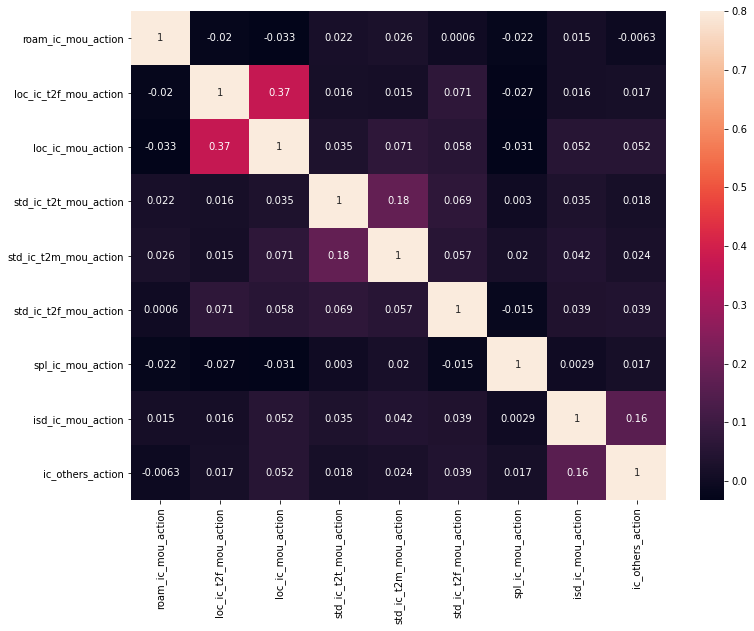

In [248]:
result = final_data[['roam_ic_mou_action','loc_ic_t2f_mou_action','loc_ic_mou_action','std_ic_t2t_mou_action','std_ic_t2m_mou_action',
           'std_ic_t2f_mou_action','spl_ic_mou_action','isd_ic_mou_action','ic_others_action']].corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(result, vmax = .8, annot=True)
plt.show()

In [250]:
# Dropping loc_ic_t2f_mou_action as it is highly correlated with loc_mou_action
final_data = final_data.drop('loc_ic_t2f_mou_action',axis=1)

In [253]:
final_data = final_data.drop('loc_ic_t2f_mou_good',axis=1)

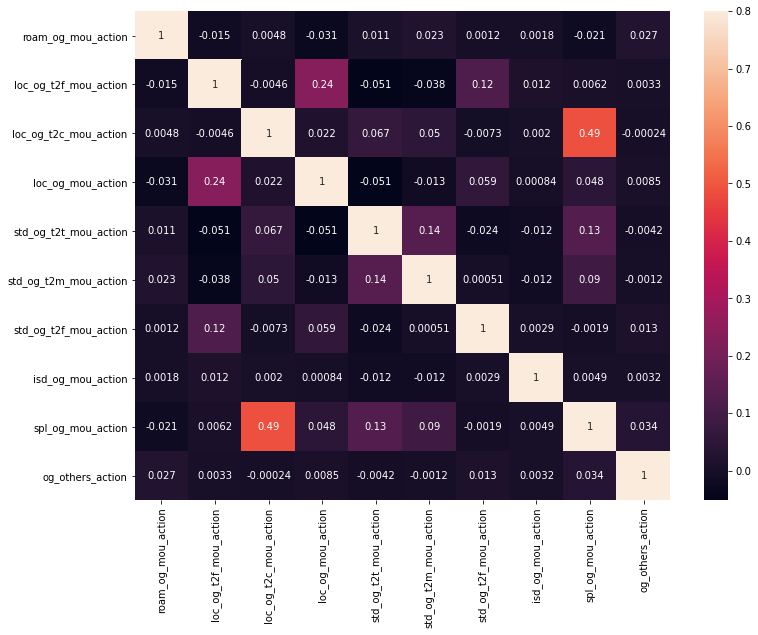

In [226]:
result = final_data[['roam_og_mou_action','loc_og_t2f_mou_action','loc_og_t2c_mou_action','loc_og_mou_action'
                     ,'std_og_t2t_mou_action','std_og_t2m_mou_action',
                       'std_og_t2f_mou_action','isd_og_mou_action','spl_og_mou_action','og_others_action']].corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(result, vmax = .8, annot=True)
plt.show()

In [252]:
# Dropping loc_og_t2c_action  as it is highly correlated with spl_og_mou_action
final_data = final_data.drop('loc_og_t2c_mou_action',axis=1)

In [254]:
final_data = final_data.drop('loc_og_t2c_mou_good',axis=1)

In [227]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,arpu_2g_good,Churn
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,968,30.40,0.00,101.20,3.58,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,424.34,1
7,3171.48,52.29,325.91,31.64,38.06,53.23,0.00,255.79,12.01,49.14,16.68,10.01,6.50,0.00,39.53,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,253.62,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,1
8,137.36,35.08,136.48,0.00,0.00,0.00,7.15,63.04,22.58,75.69,0.00,0.00,10.23,0.00,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,315,21.03,910.65,122.16,0.00,207.00,870.94,764.72,175.29,0.00,0.00,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,0.00,0
21,637.76,85.14,983.39,0.00,0.00,1.58,0.00,129.74,61.79,876.99,0.00,0.00,0.00,0.00,10.39,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,0.75,0.00,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,7.45,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0
23,366.97,33.58,205.89,0.00,0.00,0.00,17.71,182.14,0.00,39.61,0.00,0.00,17.71,0.00,0.71,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,197.27,150.67,0.00,0,0,1,1,604,40.45,51.86,0.00,0.00,540.00,268.25,99.62,174.77,0.00,0.00,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,179,179,179.00,0.00,2.00,0.48,599.09,306.57,0,0.00,0,2,0,8,454,712.00,301.78,0


In [228]:
final_data['vbc_3g_good'] = final_data['jun_vbc_3g'] + final_data['jul_vbc_3g']
final_data.rename(columns={
    'aug_vbc_3g': 'vbc_3g_action'
},inplace=True)
final_data = final_data.drop(['jun_vbc_3g','jul_vbc_3g'],axis=1)

In [255]:
final_data = final_data.drop('sep_vbc_3g',axis=1)

In [229]:
final_data.head()

,arpu_action,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_t2c_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_t2f_mou_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,arpu_3g_action,arpu_2g_action,night_pck_user_action,monthly_2g_action,sachet_2g_action,monthly_3g_action,sachet_3g_action,aon,vbc_3g_action,sep_vbc_3g,total_rech_amt_data_action,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,arpu_3g_good,monthly_2g_good,night_pck_user_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,arpu_2g_good,Churn,vbc_3g_good
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.15,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,212.17,212.17,0.00,0,0,1,0,968,30.40,3.58,252.00,412.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,424.34,0,0.00,0,2,0,7,614,504.00,424.34,1,101.20
7,3171.48,52.29,325.91,31.64,38.06,53.23,0.00,255.79,12.01,49.14,16.68,10.01,6.50,0.00,39.53,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802,57.74,0.00,0.00,2419.03,112.52,1020.59,49.72,36.33,117.27,0.00,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,253.62,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,10,2370,0.00,0.00,1,38.12
8,137.36,35.08,136.48,0.00,0.00,0.00,7.15,63.04,22.58,75.69,0.00,0.00,10.23,0.00,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,19.83,0.00,0.00,0,3,0,0,315,21.03,0.00,207.00,870.94,764.72,175.29,0.00,0.00,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,0.00,1,0.00,1,0,0,40,1038,354.00,0.00,0,1032.81
21,637.76,85.14,983.39,0.00,0.00,1.58,0.00,129.74,61.79,876.99,0.00,0.00,0.00,0.00,10.39,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,1112.21,234.52,1654.61,0.00,0.00,0.75,0.00,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,7.45,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,48,1280,0.00,0.00,0,0.00
23,366.97,33.58,205.89,0.00,0.00,0.00,17.71,182.14,0.00,39.61,0.00,0.00,17.71,0.00,0.71,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,197.27,150.67,0.00,0,0,1,1,604,40.45,0.00,540.00,268.25,99.62,174.77,0.00,0.00,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,179,179,179.00,0.00,2.00,0.48,599.09,306.57,0,0.00,0,2,0,8,454,712.00,301.78,0,51.86


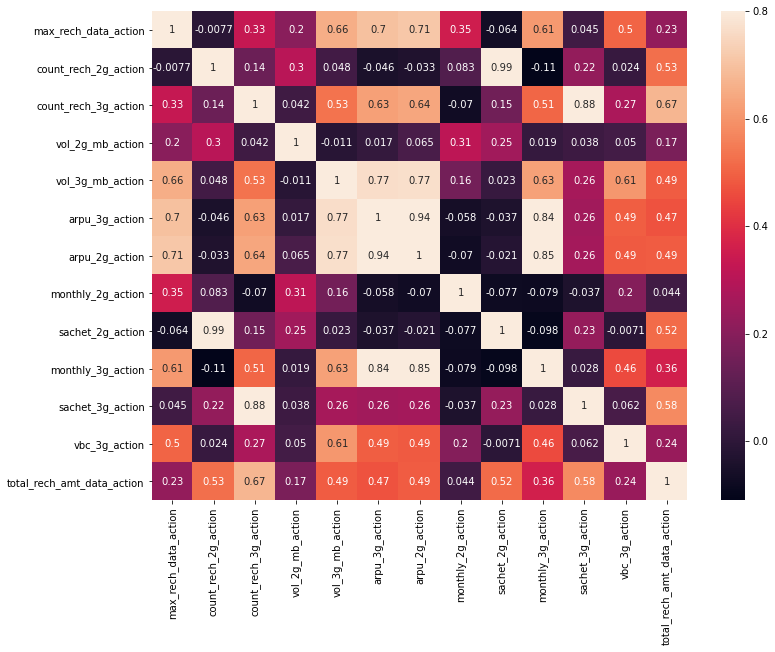

In [245]:
result_action = final_data[['max_rech_data_action','count_rech_2g_action','count_rech_3g_action',
                     'vol_2g_mb_action','vol_3g_mb_action','arpu_3g_action','arpu_2g_action',
                    'monthly_2g_action','sachet_2g_action','monthly_3g_action','sachet_3g_action',
                    'vbc_3g_action','total_rech_amt_data_action']].corr()


fig = plt.figure(figsize = (12, 9))
sns.heatmap(result_action, vmax = .8, annot=True)
plt.show()

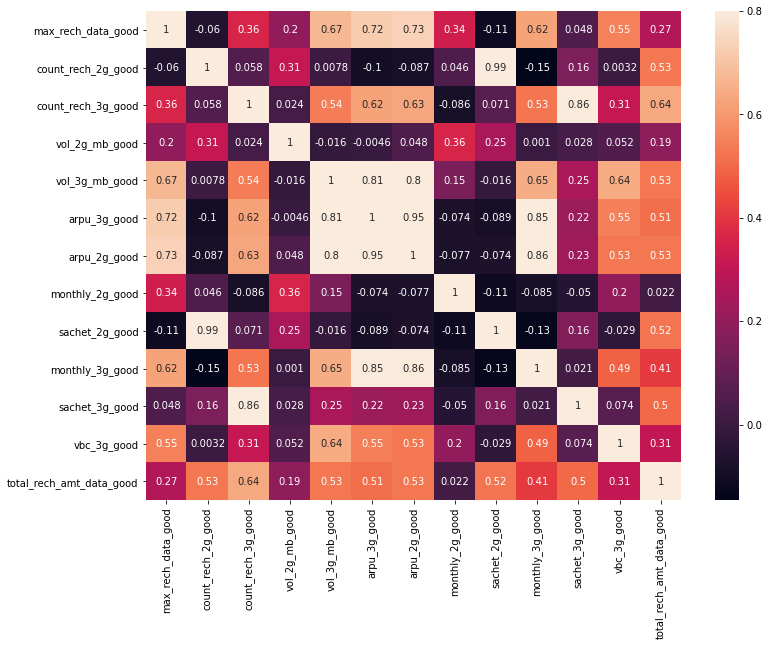

In [246]:
result_good = final_data[['max_rech_data_good','count_rech_2g_good','count_rech_3g_good',
                     'vol_2g_mb_good','vol_3g_mb_good','arpu_3g_good','arpu_2g_good',
                    'monthly_2g_good','sachet_2g_good','monthly_3g_good','sachet_3g_good',
                    'vbc_3g_good','total_rech_amt_data_good']].corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(result_good, vmax = .8, annot=True)
plt.show()

In [257]:
# dropping sachet_3g , arpu_3g , arpu_2g , sachet_2g,sacht_3g for high correlation
final_data = final_data.drop(['sachet_3g_good','sachet_3g_action','arpu_3g_action',
                              'arpu_3g_good','arpu_2g_good','arpu_2g_action',
                              'sachet_2g_good','sachet_2g_action','sachet_3g_good',
                             'sachet_3g_action'],axis=1)

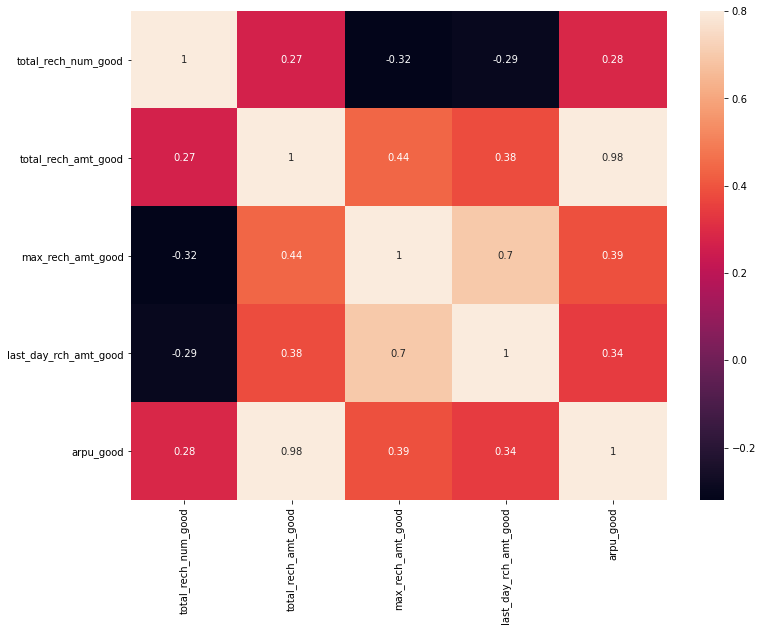

In [243]:
result = final_data[['total_rech_num_good','total_rech_amt_good','max_rech_amt_good','last_day_rch_amt_good','arpu_good']].corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(result, vmax = .8, annot=True)
plt.show()

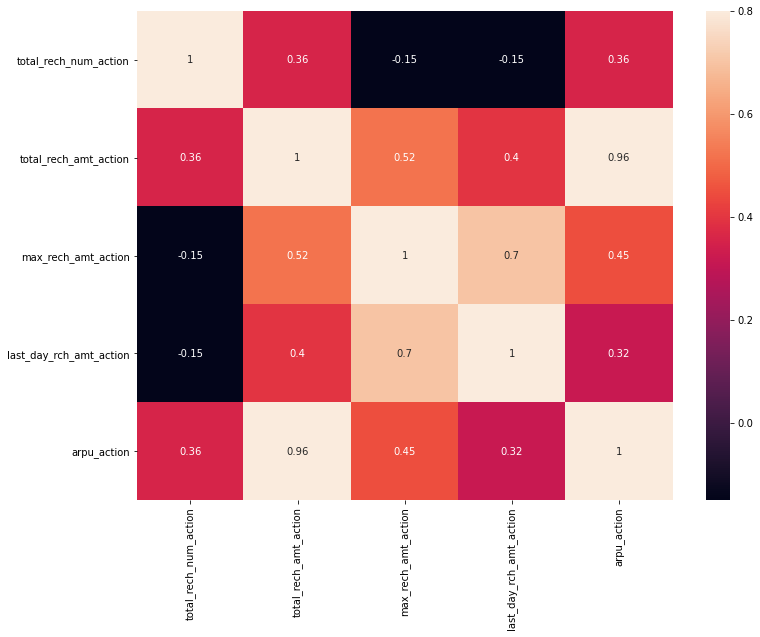

In [244]:
result = final_data[['total_rech_num_action','total_rech_amt_action','max_rech_amt_action','last_day_rch_amt_action','arpu_action']].corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(result, vmax = .8, annot=True)
plt.show()

In [259]:
# Drpping arpu
final_data = final_data.drop(['arpu_good','arpu_action'],axis=1)

In [260]:
final_data.head()

,onnet_mou_action,offnet_mou_action,roam_ic_mou_action,roam_og_mou_action,loc_og_t2f_mou_action,loc_og_mou_action,std_og_t2t_mou_action,std_og_t2m_mou_action,std_og_t2f_mou_action,isd_og_mou_action,spl_og_mou_action,og_others_action,loc_ic_mou_action,std_ic_t2t_mou_action,std_ic_t2m_mou_action,std_ic_t2f_mou_action,spl_ic_mou_action,isd_ic_mou_action,ic_others_action,total_rech_num_action,total_rech_amt_action,max_rech_amt_action,last_day_rch_amt_action,max_rech_data_action,count_rech_2g_action,count_rech_3g_action,vol_2g_mb_action,vol_3g_mb_action,night_pck_user_action,monthly_2g_action,monthly_3g_action,aon,vbc_3g_action,total_rech_amt_data_action,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2f_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,max_rech_amt_good,last_day_rch_amt_good,max_rech_data_good,count_rech_2g_good,count_rech_3g_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,night_pck_user_good,monthly_3g_good,total_rech_num_good,total_rech_amt_good,total_rech_amt_data_good,Churn,vbc_3g_good
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,252,252.00,0.00,1.00,5.75,109.61,0.00,0,1,968,30.40,252.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,504,504,504.00,0.00,2.00,31.45,234.33,0,0.00,2,7,614,504.00,1,101.20
7,52.29,325.91,31.64,38.06,53.23,255.79,12.01,49.14,16.68,10.01,6.50,0.00,188.04,30.39,141.33,22.21,0.00,31.59,15.14,7,3638,1580,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,802,57.74,0.00,112.52,1020.59,49.72,36.33,117.27,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,783.11,48.72,218.43,86.43,0.21,16.59,30.93,2370,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,10,2370,0.00,1,38.12
8,35.08,136.48,0.00,0.00,0.00,63.04,22.58,75.69,0.00,0.00,10.23,0.00,15.79,0.10,0.65,0.00,0.00,0.00,0.00,14,120,30,10,23.00,3.00,0.00,0.03,11.94,0.00,0,0,315,21.03,207.00,764.72,175.29,0.00,0.00,0.00,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,105.26,0.58,26.51,0.00,0.00,0.00,0.00,244,50,154.00,2.00,0.00,356.00,750.95,1,0.00,0,40,1038,354.00,0,1032.81
21,85.14,983.39,0.00,0.00,1.58,129.74,61.79,876.99,0.00,0.00,0.00,0.00,159.11,0.18,101.74,0.00,0.00,0.00,0.00,27,718,50,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,720,0.00,0.00,234.52,1654.61,0.00,0.00,0.75,191.13,223.87,1474.10,0.00,1697.98,0.00,0.00,0.00,213.01,20.04,105.92,0.00,0.00,0.00,0.00,100,50,0.00,0.00,0.00,0.00,0.00,0,0.00,0,48,1280,0.00,0,0.00
23,33.58,205.89,0.00,0.00,0.00,182.14,0.00,39.61,0.00,0.00,17.71,0.00,224.21,13.38,43.91,0.00,0.00,3.74,13.06,4,439,179,0,179.00,0.00,2.00,0.01,1009.92,0.00,0,1,604,40.45,540.00,99.62,174.77,0.00,0.00,0.00,265.59,0.00,8.71,0.00,8.71,0.01,0.10,0.00,291.04,0.51,17.32,0.00,0.00,28.23,5.35,179,179,179.00,0.00,2.00,0.48,599.09,0,0.00,2,8,454,712.00,0,51.86


In [261]:
final_data.shape

(30001, 69)